<a href="https://colab.research.google.com/github/MuhammadMazid/Banknote-authentication/blob/main/BANK_NOTE_AUTHENTICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BANK NOTE AUTHENTICATION

The data file banknote_authentication.csv is the source of information for the classification problem. The number of instances (rows) in the data set is 1372, and the number of variables (columns) is 5.

Dataset description link: <a href='https://archive.ics.uci.edu/ml/datasets/banknote+authentication'>Click</a>


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

### 1.0 Importing the libraries

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2.0 Loading the dataset

In [29]:
df = pd.read_csv(r'C:\Users\muham\Desktop\banknote+authentication\data_banknote_authentication.txt',
                 names=['variance', 'skewness', 'cutrosis', 'entropy', 'class'])
df.head ()

,variance,skewness,cutrosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [30]:
df.tail ()

,variance,skewness,cutrosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


### 3.0 Data description

In [31]:
df.shape

(1372, 5)

**Observations**

+ 1372 rows and 5 columns

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   cutrosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


**Observations**

+ variance, skewness, cutrosis, and entropy are all  float data type
+ class is an interer data type

In [33]:
df.describe ()

,variance,skewness,cutrosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [34]:
df.columns

Index(['variance', 'skewness', 'cutrosis', 'entropy', 'class'], dtype='object')

In [35]:
df.isna().sum() #  check for missing values

variance    0
skewness    0
cutrosis    0
entropy     0
class       0
dtype: int64

In [36]:
df.duplicated().sum() # check for duplicated rows

24

In [37]:
print(df.shape)
df.drop_duplicates(inplace=True) # drop duplicated rows
df.shape

(1372, 5)


(1348, 5)

# 4.0 Exploratory Data Analysis (EDA)

## 4.01 Change Plots Styles

In [38]:
sns.set_style('darkgrid')
plt.style.use('bmh')

## 4.1 Univariate Analysis

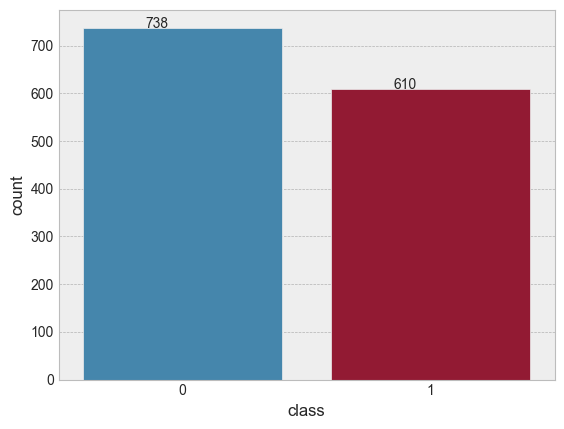

In [41]:
ax = sns.countplot (x='class',data=df)
for p in ax.patches: # loop to add count to bar
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()))

<Figure size 2900x1700 with 0 Axes>

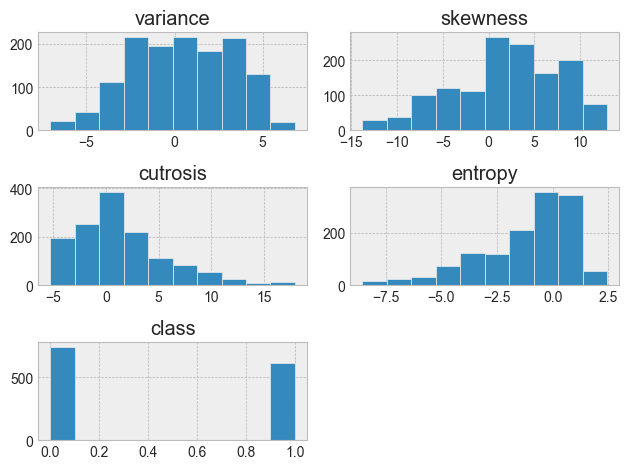

<Figure size 2900x1700 with 0 Axes>

In [44]:
df.hist()
plt.tight_layout()
plt.figure(figsize=(29,17))

### 4.11 Univariate Analysis by Target

Text(0.5, 1.0, 'Variance Distribution')

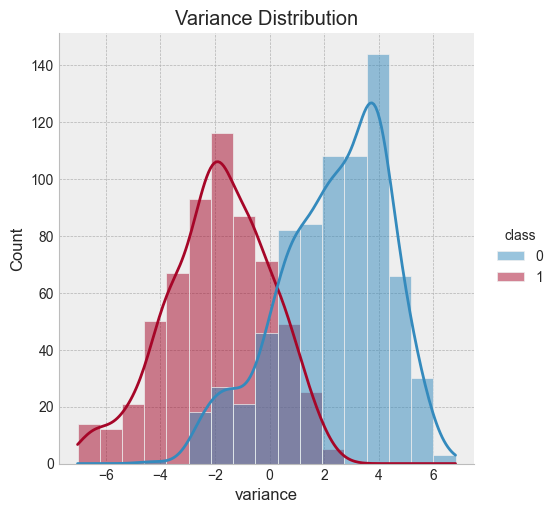

In [48]:
sns.displot(data=df, x='variance', hue='class', kde=True)
plt.title('Variance Distribution')

* Variance appears to follow a distribution that resembles normality.

Text(0.5, 1.0, 'Skewness Distribution')

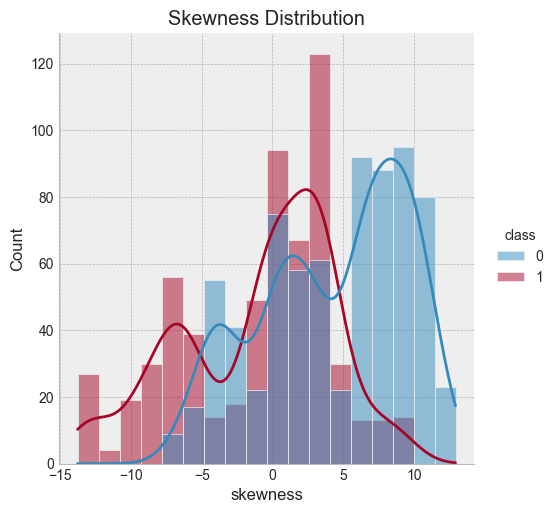

In [52]:
sns.displot(data=df, x='skewness', hue='class', kde=True)
plt.title('Skewness Distribution')

* Skewness is more prevalent on the positive side.

Text(0.5, 1.0, 'Curtosis Distribution')

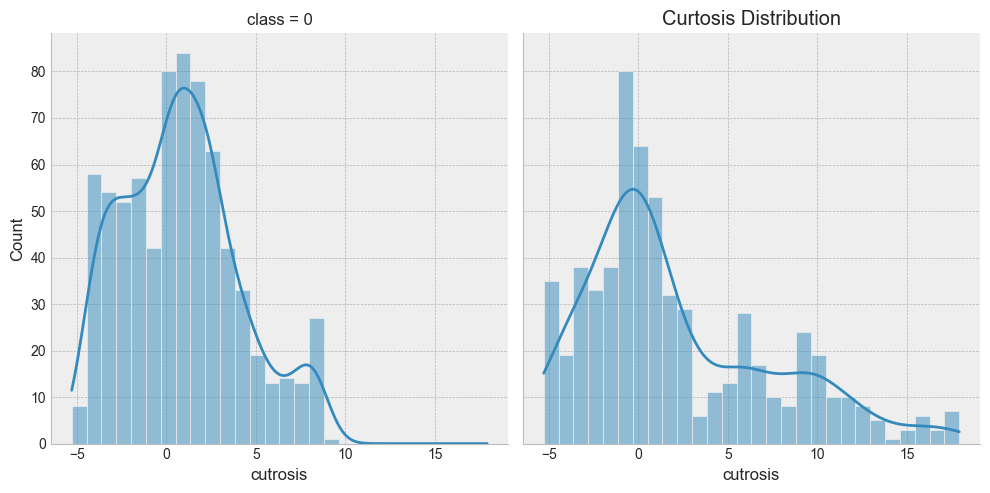

In [54]:
sns.displot(data=df, x='cutrosis',  col='class', kde=True)
plt.title('Curtosis Distribution')

* Curtosis is more distributed to the negative side

Text(0.5, 1.0, 'Entropy Distribution')

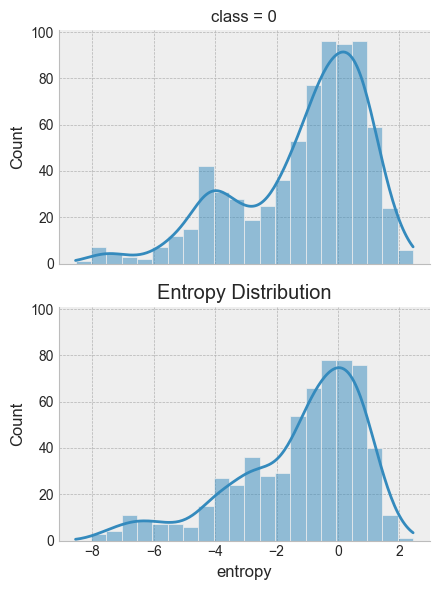

In [55]:
sns.displot(data=df, x='entropy',  row='class', kde=True,
            height=3, aspect=1.5)
plt.title('Entropy Distribution')

* Entropy is more distributed to the positive side

## 4.2 Bivariate analysis

<Axes: title={'center': '\nCorrelation of Features\n'}>

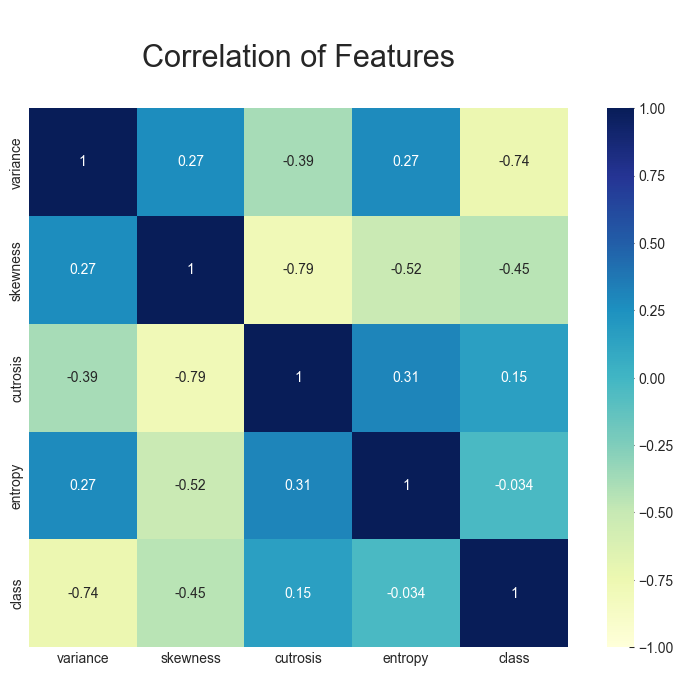

In [61]:
f, ax = plt.subplots(figsize=(10, 7))
plt.title('\nCorrelation of Features\n', fontsize=22)
sns.heatmap (df.corr(),annot=True,vmax=1,vmin=-1,square=True,cmap="YlGnBu", ax=ax)

* There is a strong negative relationship between skewness and kurtosis. The correlation between kurtosis and entropy is moderately high.

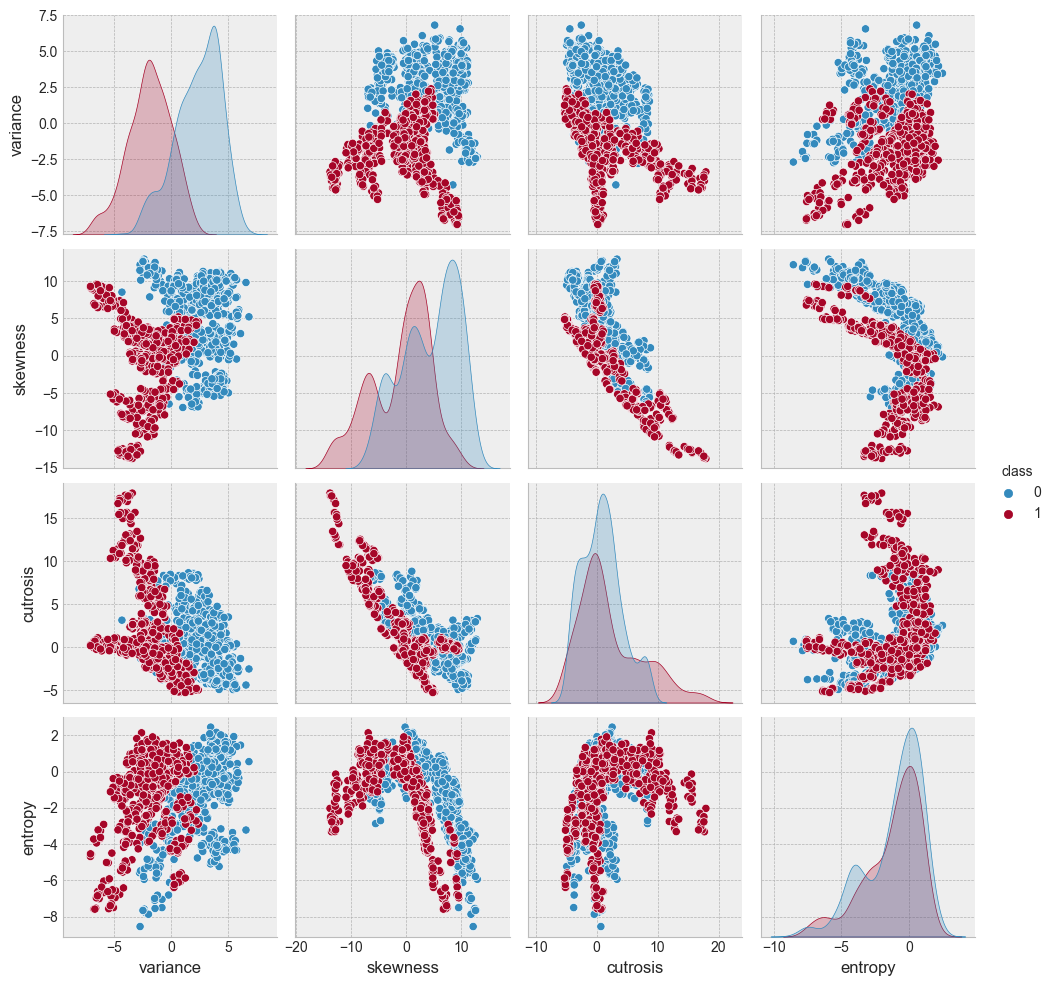

In [62]:
sns.pairplot (df, hue='class')

**Observations**

* The pairplots of the dataset demonstrate the separation and distinctness of the classes.
* The features that are connected to one another are displayed on the correlation heat map.
* Variance by all other features does a good job separating classes



# 5.0 Modeling

## 5.1 Train Test Split

In [63]:
df.columns

Index(['variance', 'skewness', 'cutrosis', 'entropy', 'class'], dtype='object')

In [65]:
features = ['variance', 'skewness', 'cutrosis', 'entropy']
target = ['class']

In [66]:
X = df[features]
y = df[target]

##

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(903, 4)
(445, 4)
(903, 1)
(445, 1)


## 7.0 Feature Scaling

In [70]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Observations**

+ scaling the test data with the mean and standard deviation learned from the training

[link text](https://)## 8.0 Logistic Regression

### 8.1 fit

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
lr = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=.7)
lr.fit(X_train,y_train)

C:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(l1_ratio=0.7, penalty='elasticnet', solver='saga')

### 8.2 Confusion Matrix

In [83]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [85]:
predicted = lr.predict(X_test)

precision, recall, fscore, support = score(y_test, predicted)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))


precision: [1.         0.98522167]
recall: [0.9877551 1.       ]
fscore: [0.99383984 0.99255583]
support: [245 200]


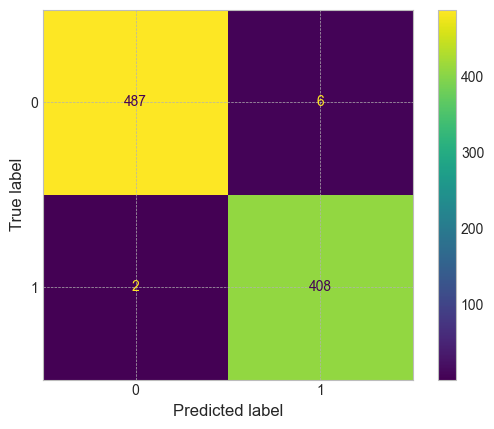

In [112]:
ConfusionMatrixDisplay.from_estimator(lr, X_train, y_train)


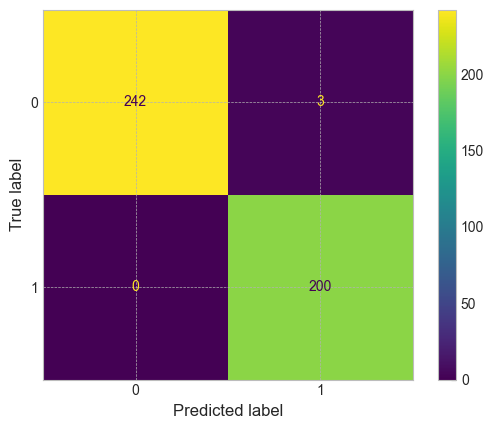

In [113]:
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

### 8.3 Accruacy

In [115]:
lr_acc_train = lr.score(X_train, y_train)
lr_acc_test = lr.score(X_test, y_test)
lr_acc_train, lr_acc_test

(0.991140642303433, 0.9932584269662922)

### 8.4 Classification Report

In [89]:
from sklearn.metrics import classification_report
print(classification_report (y_train,lr.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       493
           1       0.99      1.00      0.99       410

    accuracy                           0.99       903
   macro avg       0.99      0.99      0.99       903
weighted avg       0.99      0.99      0.99       903



In [90]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       245
           1       0.99      1.00      0.99       200

    accuracy                           0.99       445
   macro avg       0.99      0.99      0.99       445
weighted avg       0.99      0.99      0.99       445





```
# This is formatted as code
```

## 9.0 Random Forest

### 9.1 Fit

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() #(n_estimators=100, max_depth=2, criterion='entropy')

In [119]:
rf.fit(X_train, y_train)


C:\Users\muham\AppData\Local\Temp\ipykernel_29084\3789948204.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier()

### 9.2 Confusion Matrix

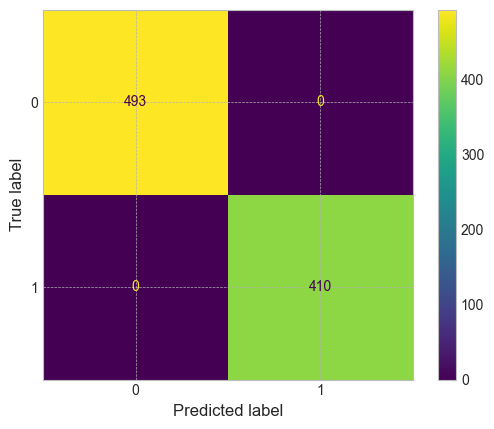

In [120]:
ConfusionMatrixDisplay.from_estimator(rf, X_train, y_train)


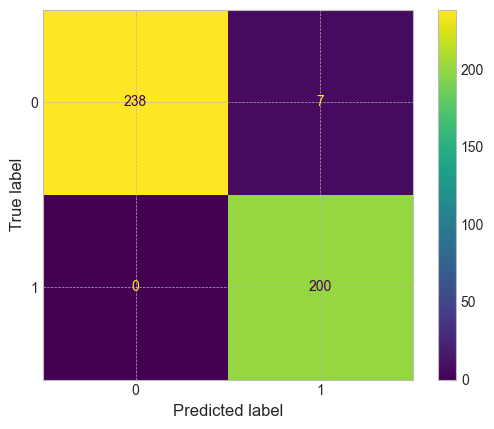

In [121]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

### 9.3 Accuracy Scores

In [122]:
rf_acc_train = rf.score(X_train, y_train)
rf_acc_test = rf.score(X_test, y_test)
rf_acc_train, rf_acc_test

(1.0, 0.9842696629213483)

In [123]:
print(classification_report(y_train, rf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       493
           1       1.00      1.00      1.00       410

    accuracy                           1.00       903
   macro avg       1.00      1.00      1.00       903
weighted avg       1.00      1.00      1.00       903



In [124]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       245
           1       0.97      1.00      0.98       200

    accuracy                           0.98       445
   macro avg       0.98      0.99      0.98       445
weighted avg       0.98      0.98      0.98       445



### 9.4 Tree Plot

In [125]:
from sklearn.tree import plot_tree

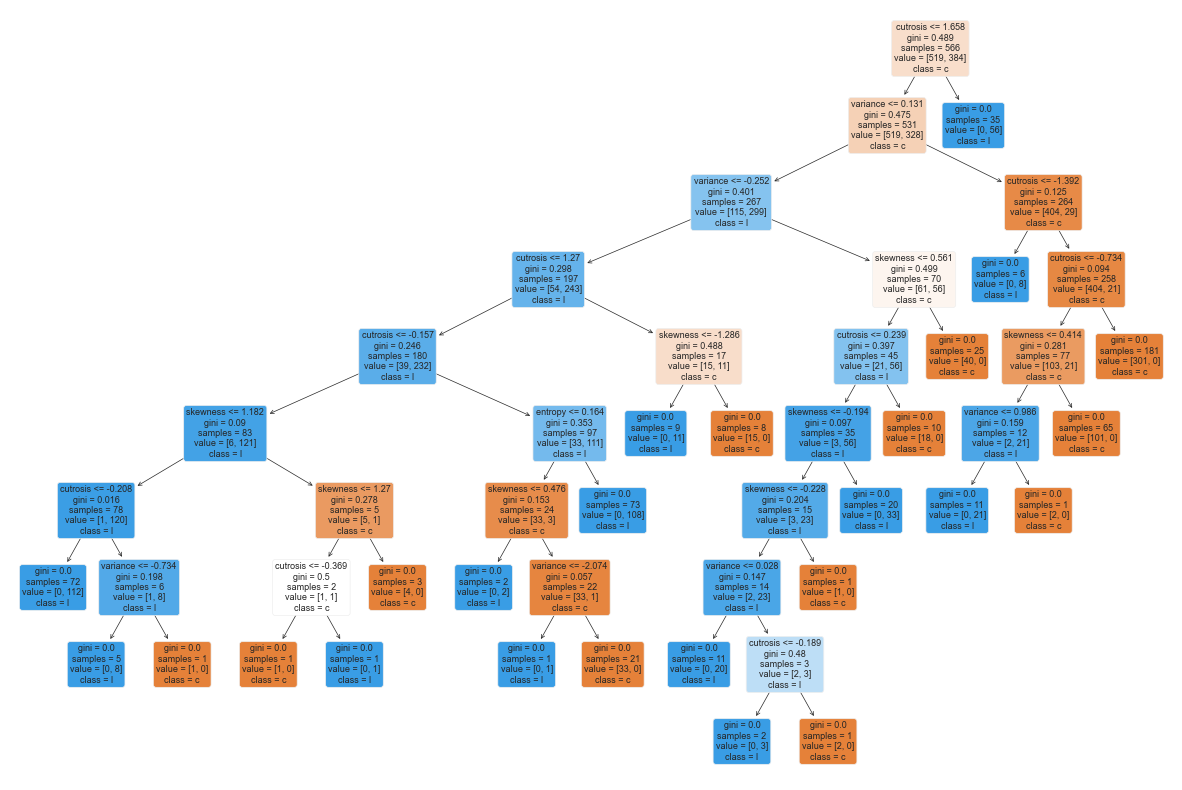

In [126]:
plt.figure(figsize=(15, 10))
plot_tree(rf.estimators_[0],
          feature_names=df.columns[:4],
          class_names='class',
          filled=True, impurity=True,
          rounded=True)
plt.show()

## 10.0 Model Summary

In [128]:
models = pd.DataFrame ({
     'Model': ['Log Reg train','Log Reg test',
               'Rand Forest train','Rand Forest test',
               ],
    'Score': [lr_acc_train, lr_acc_test,
              rf_acc_train, rf_acc_test]})

models.sort_values(by='Score', ascending=False)


,Model,Score
2,Rand Forest train,1.000000
1,Log Reg test,0.993258
0,Log Reg train,0.991141
3,Rand Forest test,0.984270


**Observations**

+ On this very simple dataset Logistic Regression and Random Forest did equally well.  The small difference in scores is likely statistically insignificant.

+